<div style="text-align: center; color:rgb(0, 0, 0); font-family: Arial, sans-serif; background-color:rgb(137, 200, 129); padding: 10px; border-radius: 10px; box-shadow: 0 4px 8px rgba(0, 0, 0, 1.2); line-height: 0.1;">

### **Series de Tiempo**
#### **Universidad Central**
#### Maestría en Analítica de Datos
#### Docente: Wilson Sandoval Rodriguez
##### wsandovalr@ucentral.edu.co

</div>

<div style="text-align: center; color: #5a8d84; font-family: Arial, sans-serif; background-color:rgb(244, 228, 200); padding: 10px; border-radius: 2px; box-shadow: 0 5px 8px rgba(0, 0, 0, 0.5); line-height: 1.2;">

# **1. Introducción a las series de tiempo** <a class="anchor" id="1"></a>
</div>

<div style=" font-family: Arial, sans-serif; background-color:rgb(237, 245, 249); padding: 10px; border-radius: 2px; box-shadow: 0 5px 8px rgba(0, 0, 0, 0.5); line-height: 1.2;">


-   **objetivo:** Aprender y aplicar métodos estadísticos para el
    análisis de los datos que se han observado a lo largo del tiempo.

-   **Desafío**  dar cuenta de la correlación entre las
    mediciones que están cerca en el tiempo. Los temas cubiertos en este
    curso incluyen métodos para:

-   Modelado de datos de series temporales univariantes con modelos
    autorregresivos y de media móvil (denominados modelos ARIMA, a veces
    llamados modelos Box Jenkins).

-   Herramientas para la identificación del modelo, la estimación del
    modelo y la evaluación de la idoneidad del modelo.

-   Usar un modelo para pronosticar y determinar intervalos de
    predicción para pronósticos.


<div style=" font-family: Arial, sans-serif; background-color:rgb(244, 228, 200); padding: 10px; border-radius: 2px; box-shadow: 0 5px 8px rgba(0, 0, 0, 0.5); line-height: 1.2;">


| Año         | Hito                                                        | Descripción                                                                                             |
|-------------|-------------------------------------------------------------|---------------------------------------------------------------------------------------------------------|
| 1920s       | Modelos autoregresivos y descomposición (Yule, Slutsky)     | Conceptos iniciales sobre modelos autoregresivos y la descomposición en tendencia, estacionalidad, ciclo y error. |
| 1930s–1940s | Procesos estocásticos y filtrado (Kolmogorov, Wiener)         | Establecimiento de fundamentos en teoría de procesos estocásticos y técnicas de filtrado para series de tiempo.    |
| 1960s       | Filtro de Kalman y modelos de espacio de estados            | Introducción del filtro de Kalman y el uso de modelos de espacio de estados para la estimación en sistemas dinámicos. |
| 1970s       | Revolución Box-Jenkins (ARIMA)                              | Consolidación del modelo ARIMA como estándar para el análisis y pronóstico de series temporales.                |
| 1997        | Aparición de LSTM                                           | Se introducen las LSTM, una variante de RNN que mejora el modelado de dependencias a largo plazo en datos secuenciales. |
| 2000s       | Era del Big Data y machine learning                         | Integración de machine learning con métodos clásicos, impulsada por el auge del Big Data.                       |
| 2017        | Lanzamiento de Facebook Prophet                             | Presentación de Prophet, una herramienta de código abierto para pronósticos que automatiza el manejo de estacionalidades y tendencias. |
| 2020s       | Deep learning y análisis en tiempo real                     | Avances en deep learning aplicados al análisis en tiempo real, detección de anomalías y modelado multivariante.   |


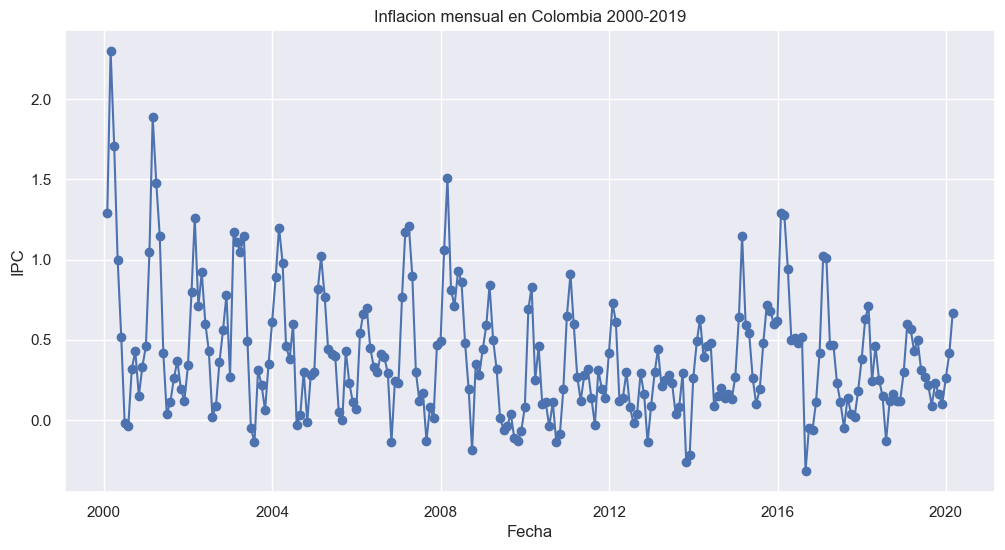

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="dark", color_codes=True)

# Generar un rango de fechas
dates = pd.date_range(start='2000-01-31', end="2020-02-29", freq='ME')
df = pd.read_excel("https://github.com/Wilsonsr/Series-de-Tiempo/raw/main/Data/INFLACION.xlsx")
df.index = dates


# Visualizar la serie de tiempo
plt.figure(figsize=(12, 6))
plt.plot(df.index, df["Inflación mensual"]*100, marker='o', linestyle='-', color='b')
plt.title('Inflacion mensual en Colombia 2000-2019')
plt.xlabel('Fecha')
plt.ylabel('IPC')
plt.grid(True)
plt.show()


---
<div  style="color: #5a8d84">

### **Definición:**

</div>

---


Una $\textbf{serie de tiempo}$ es una secuencia de datos numéricos observados o registrados en puntos sucesivos en el tiempo, generalmente a intervalos uniformemente espaciados. Matemáticamente, una serie de tiempo se define como una colección de observaciones $(x_t)$ donde $t$ denota el tiempo y $x_t$ es el valor de la observación en el tiempo $t$.

Formalmente, se puede expresar como:
$$\{x_t\}_{t \in T} = \{x_t\}, \quad t \in T$$
donde:


- $ \{x_t\} $ representa la serie de tiempo,
- $t$ es el índice temporal, y
- $T$ es el conjunto de todos los puntos en el tiempo en los cuales las observaciones se han realizado, como $T = \{t_1, t_2, t_3, \ldots, t_n\} $.

Las series de tiempo pueden ser:

- **Determinísticas** Una serie de tiempo es determinística si su comportamiento puede ser descrito completamente por una función matemática sin componentes aleatorias. En otras palabras, dado un modelo matemático y los valores iniciales, se puede predecir el valor futuro de la serie con exactitud.
  
- **Estocásticas** sna serie de tiempo es estocástica si incluye componentes aleatorias, lo que significa que no se puede predecir con certeza el valor futuro de la serie, incluso conociendo el modelo matemático subyacente. Estas series incorporan variabilidad inherente y están sujetas a incertidumbre.

<div style=" font-family: Arial, sans-serif; background-color:rgb(237, 245, 249); padding: 10px; border-radius: 2px; box-shadow: 0 5px 8px rgba(0, 0, 0, 0.5); line-height: 1.2;">

### **Objetivos básicos del análisis**

El objetivo básico generalmente es determinar un modelo que describa el
patrón de las series de tiempo. Los usos para tal modelo son:

-   Describir las características importantes del patrón de series de
    tiempo.
-   Explicar cómo el pasado afecta el futuro o cómo dos series
    temporales pueden "interactuar".
-   Para pronosticar valores futuros de la serie.
-   Posiblemente sirva como un estándar de control para una variable que
    mide la calidad del producto en algunas situaciones de fabricación.

- La metodología de es una herramienta estadística que pretende estudiar un mismo fenómeno cuantitativo a través del tiempo con la finalidad de poder obtener pronósticos de forma asertiva.

- Esta metodología se utiliza ampliamente en los negocios, las ciencias sociales, las ciencias biológicas, y en muchas otras disciplinas.

<span style= "color: #5a8d84 ">

### **Economía y Marketing**

</span>

- Proyecciones del empleo y desempleo.
- Evolución del índice de precios de la leche.
- Beneficios netos mensuales de cierta entidad bancaria.
- Índices del precio del petróleo

<center>
  <img src="https://github.com/Wilsonsr/Series-de-Tiempo/raw/main/Data/economia.png" alt="economia" style="width: 600; height: 400;">
</center>




<span style= "color: #5a8d84 ">

### **Demografía**

</span>

- Número de habitantes por año.
- Tasa de mortalidad infantil por año.

<center>
    <img src="https://github.com/Wilsonsr/Series-de-Tiempo/raw/main/Data/demografia.png" width="350">
</center>





<div style= "color: #5a8d84; style="text-align: center ">

###  **Medioambiente**

</div>

  + Evolución horaria de niveles de óxido de azufre y de niveles de óxido de nitrógeno en una ciudad
durante una serie de años.
  + Lluvia recogida diariamente en una localidad.
  + Temperatura media mensual.
  + Medición diaria del contenido en residuos tóxicos en un río.

<center>

![Demografia](https://github.com/Wilsonsr/Series-de-Tiempo/raw/main/Data/medioambiente.png)

<div style= "color: #5a8d84; text-align: center;">

### **Algunos trabajos en series de tiempo**
</div>

<div style="display: flex; flex-wrap: wrap; justify-content: space-around;">

<div style="background: linear-gradient(to right, #f0f8ff, #e0f7fa); border-radius: 10px; padding: 10px; margin: 10px; width: 45%; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);">
<h4>Modelo de pronóstico para estimar el comportamiento del precio en bolsa de la energía en Colombia</h4>
</div>

<div style="background: linear-gradient(to right, #f0f8ff, #e0f7fa); border-radius: 10px; padding: 10px; margin: 10px; width: 45%; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);">
<h4>Análisis mediante series de tiempo de los resultados en matemáticas de las pruebas Saber 11 y niveles socioeconómicos NSE usando k-medias</h4>
</div>

<div style="background: linear-gradient(to right, #f0f8ff, #e0f7fa); border-radius: 10px; padding: 10px; margin: 10px; width: 45%; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);">
<h4>Desarrollo de una herramienta de predicción de rentas o ingresos. Caso de estudio empresa de servicios</h4>
</div>

<div style="background: linear-gradient(to right, #f0f8ff, #e0f7fa); border-radius: 10px; padding: 10px; margin: 10px; width: 45%; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);">
<h4>Propuesta de modelo ARIMA para la serie temporal de los casos de COVID-19 en Colombia aplicando la metodología Box and Jenkins</h4>
</div>

<div style="background: linear-gradient(to right, #f0f8ff, #e0f7fa); border-radius: 10px; padding: 10px; margin: 10px; width: 45%; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);">
<h4>Modelo de pronóstico para estimar el comportamiento del precio en bolsa de la energía en Colombia</h4>
</div>

<div style="background: linear-gradient(to right, #f0f8ff, #e0f7fa); border-radius: 10px; padding: 10px; margin: 10px; width: 45%; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);">
<h4>Modelo de impacto de las precipitaciones medias mensuales en el caudal mínimo mensual de las cuencas del río Cauca</h4>
</div>

<div style="background: linear-gradient(to right, #f0f8ff, #e0f7fa); border-radius: 10px; padding: 10px; margin: 10px; width: 45%; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);">
<h4>Análisis del crecimiento económico y la educación a nivel departamental en Colombia, mediante el modelo de datos panel</h4>
</div>

<div style="background: linear-gradient(to right, #f0f8ff, #e0f7fa); border-radius: 10px; padding: 10px; margin: 10px; width: 45%; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);">
<h4>Uso del modelo VAR de series de tiempo para pronosticar el incremento en el costo de los precios de los materiales en la construcción de infraestructura en Colombia</h4>
</div>

<div style="background: linear-gradient(to right, #f0f8ff, #e0f7fa); border-radius: 10px; padding: 10px; margin: 10px; width: 45%; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);">
<h4>Efectos de la tasa de cambio en la compra de software importado en América Latina</h4>
</div>

</div>

<div style= "color: #5a8d84; text-align: center;">

### **Representación gráfica de series de tiempo**

</div>


In [2]:
import pandas as pd
cafe=pd.read_excel("https://github.com/Wilsonsr/Series-de-Tiempo/raw/main/Data/cafe.xlsx")
cafe

,Fecha,Producción
0,2000-01-01,658.000000
1,2000-02-01,740.000000
2,2000-03-01,592.000000
3,2000-04-01,1055.000000
4,2000-05-01,1114.000000
...,...,...
296,2024-09-01,1071.233408
297,2024-10-01,1339.155008
298,2024-11-01,1761.409522
299,2024-12-01,1798.230552


<div style= "color: #5a8d84; text-align: center;">

## Graficando Series de Tiempo con Matplotlib
</div>

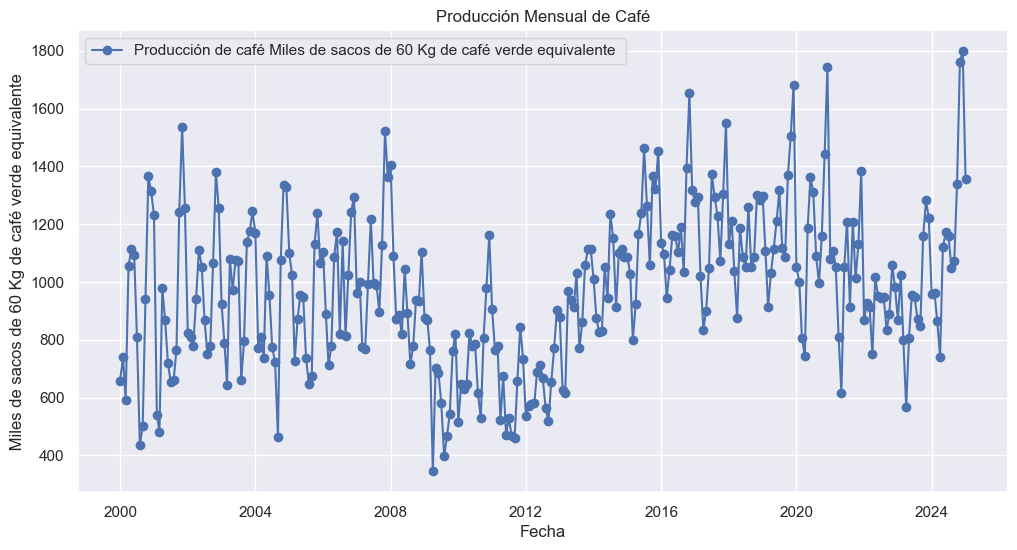

In [3]:
import matplotlib.pyplot as plt
import pandas as pd

# Asegurar que la columna "fecha" sea tipo datetime
cafe["Fecha"] = pd.to_datetime(cafe["Fecha"])
cafe = cafe.set_index("Fecha")  # Establecer la fecha como índice

# Graficar con Matplotlib
plt.figure(figsize=(12, 6))
plt.plot(cafe.index, cafe["Producción"], marker='o', linestyle='-', color='b', label="Producción de café Miles de sacos de 60 Kg de café verde equivalente ")
plt.xlabel("Fecha")
plt.ylabel(" Miles de sacos de 60 Kg de café verde equivalente ")
plt.title("Producción Mensual de Café")
plt.legend()
plt.grid(True)
plt.show()


<div style= "color: #5a8d84; text-align: center;">

## Visualización con Pandas
</div>

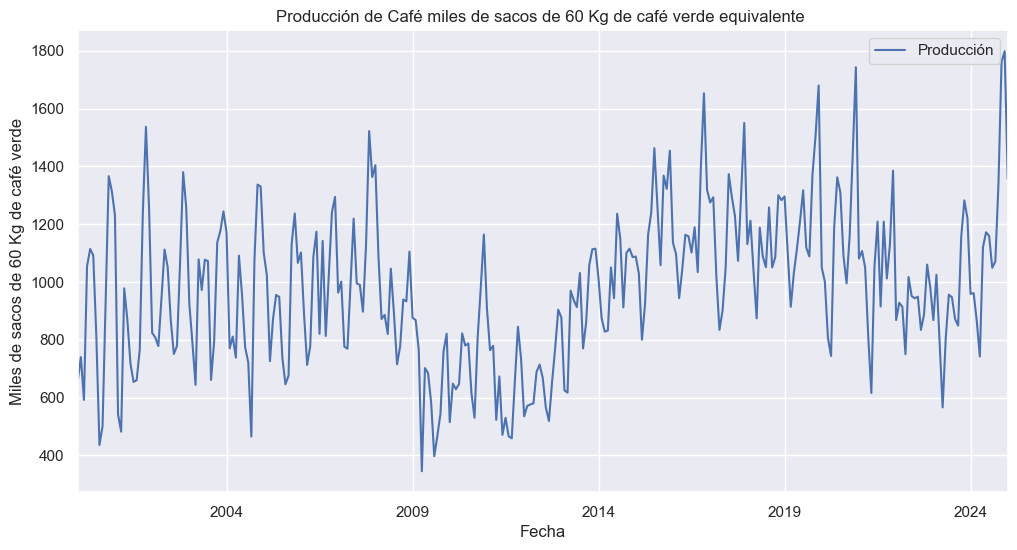

In [4]:

cafe.plot(figsize=(12, 6), title="Producción de Café miles de sacos de 60 Kg de café verde equivalente ", legend=True, grid=True)
plt.xlabel("Fecha")
plt.ylabel("Miles de sacos de 60 Kg de café verde")
plt.show()

In [5]:
import plotly.express as px

fig = px.line(cafe, x=cafe.index, y="Producción", title="Producción Mensual iles de sacos de 60 Kg de café verde equivalente  de Café", markers=True)
fig.show()



## Visualización con Seaborn


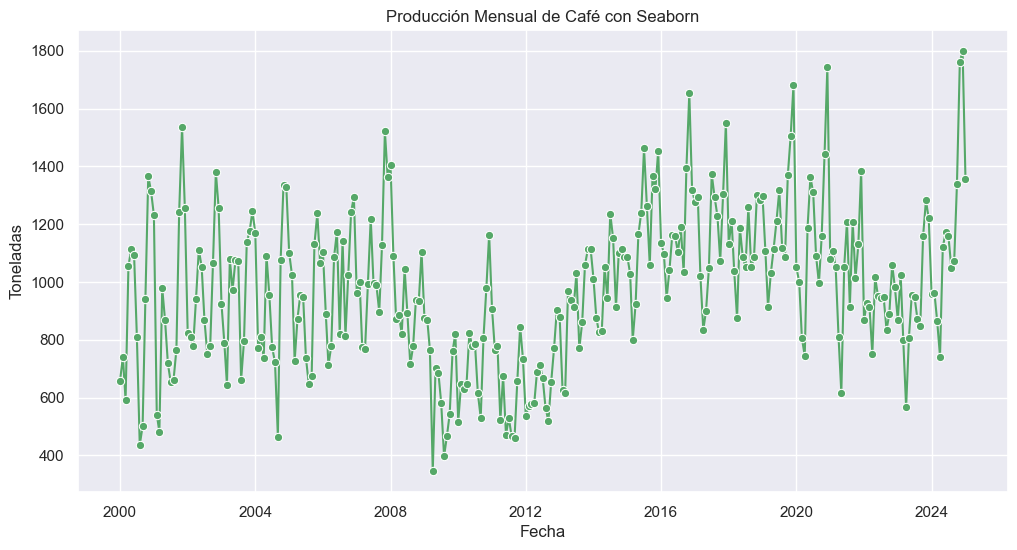

In [6]:
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.lineplot(data=cafe, x=cafe.index, y="Producción", marker="o", color="g")
plt.xlabel("Fecha")
plt.ylabel("Toneladas")
plt.title("Producción Mensual de Café con Seaborn")
plt.grid(True)
plt.show()

## Primera diferencia de la serie

$$
\begin{equation*}
\Delta y_t \equiv y_t - y_{t-1}
\end{equation*}
$$

Esta transformación

*  elimina la tendencia de la serie,
*  mantiene las oscilaciones estacionales.

In [31]:
cafe.diff(1)

,Producción
Fecha,
2000-01-01,NaN
2000-02-01,82.000000
2000-03-01,-148.000000
2000-04-01,463.000000
2000-05-01,59.000000
...,...
2024-09-01,22.233408
2024-10-01,267.921600
2024-11-01,422.254514


<Axes: title={'center': 'Diferencia de la Producción Mensual de Café'}, xlabel='Fecha'>

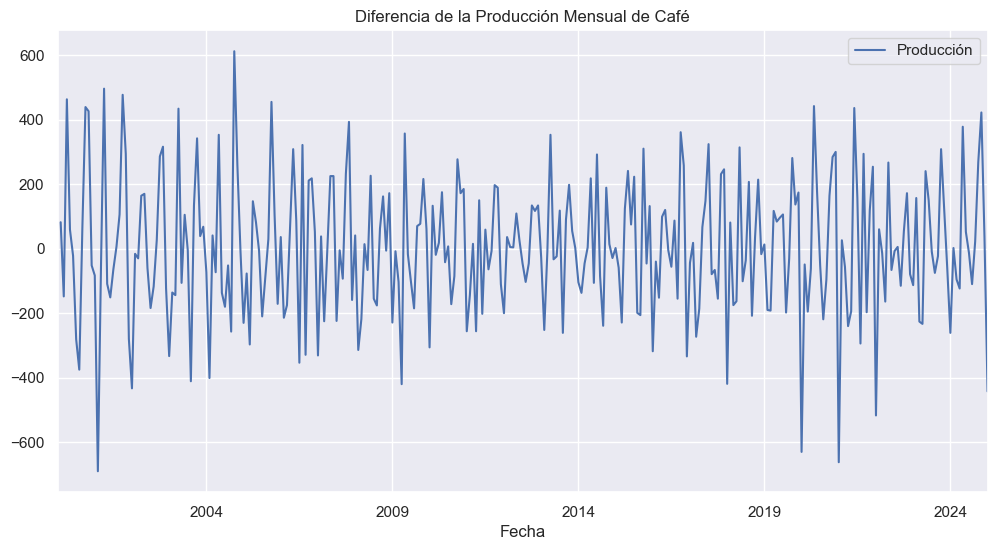

In [16]:
cafe.diff(1).plot(figsize=(12, 6), title="Diferencia de la Producción Mensual de Café", legend=True, grid=True)
       

## Tasa de crecimiento de la serie
$$
\begin{equation*}
\Delta\% y_t \equiv \frac{y_t - y_{t-1}}{y_{t-1}} \times 100
\end{equation*}
$$

<Axes: title={'center': 'Cambio Porcentual de la Producción Mensual de Café'}, xlabel='Fecha'>

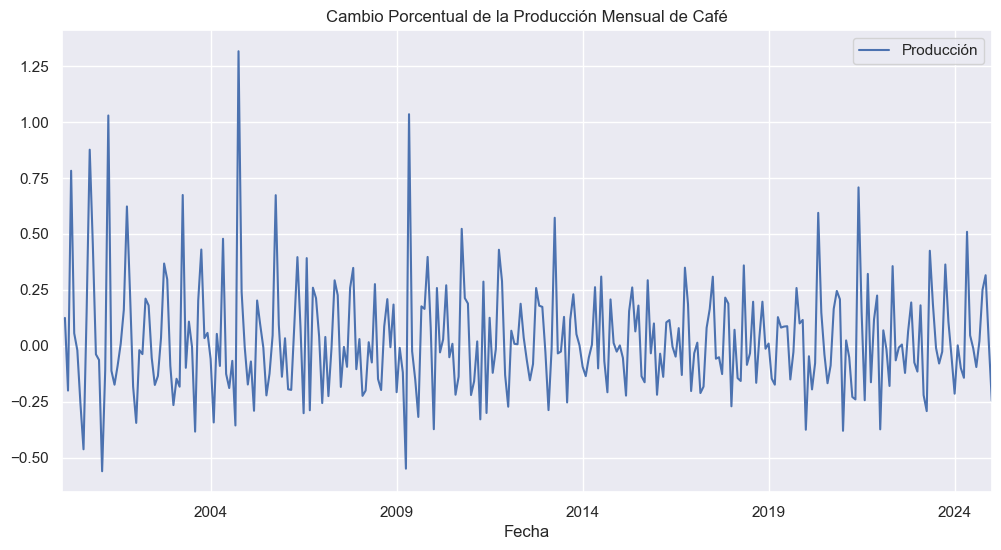

In [39]:
cafe.pct_change(1).plot(figsize=(12, 6), title="Cambio Porcentual de la Producción Mensual de Café", legend=True, grid=True)


- Eje Y (Cambio Porcentual): Representa la variación relativa de la producción de café en cada mes respecto al mes anterior. Valores positivos indican un aumento en la producción, mientras que valores negativos indican una disminución.
  
- Oscilaciones altas: Se observa que en ciertos períodos hay cambios abruptos, lo que puede reflejar eventos climáticos, políticas de producción, ciclos agrícolas o crisis en el sector.
- Tendencias y estabilidad: En los últimos años, parece haber menor variabilidad en comparación con los años anteriores, lo que podría indicar una estabilización en la producción o mejoras en los procesos agrícolas.

<Axes: title={'center': 'Diferencia de la Producción Anual de Café'}, xlabel='Fecha'>

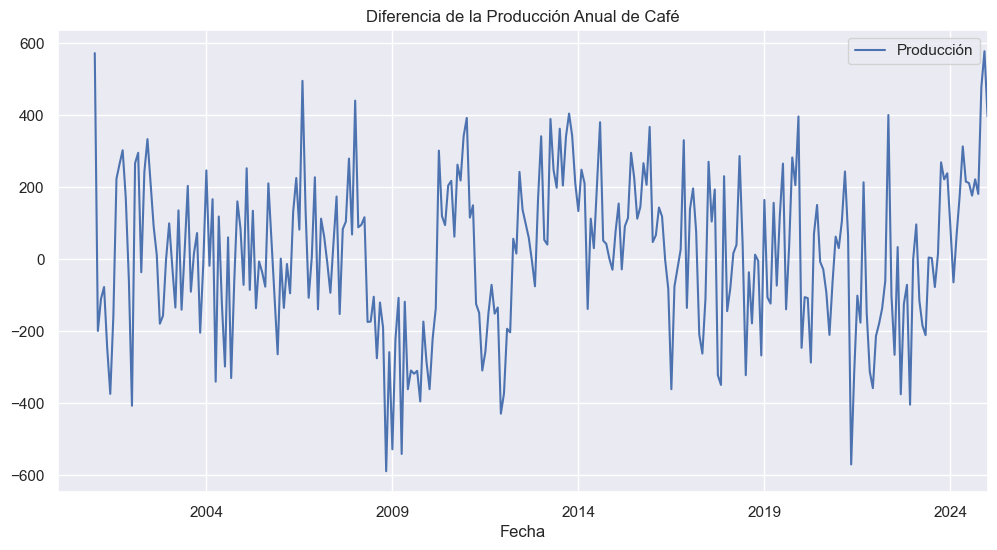

In [40]:
cafe.diff(12).plot(figsize=(12, 6), title="Diferencia de la Producción Anual de Café", legend=True, grid=True)

In [19]:
#%pip install yfinance
import yfinance as yf

In [22]:
# Fecha Inicio datos
start_date = '2022-01-01'

# Fecha fin de los datos
end_date = '2025-01-31'

In [25]:
# Descargar los datos
ticker_list = [ "META",'GOOG', 'ORCL', 'MSFT', 'AMZN']
data = yf.download(ticker_list, start=start_date, end=end_date)[['Close']]
data

[*********************100%***********************]  5 of 5 completed


Price                           Close                                      \
Ticker                           AMZN        GOOG        META        MSFT   
Date                                                                        
2022-01-03 00:00:00+00:00  170.404495  145.074493  338.540009  334.750000   
2022-01-04 00:00:00+00:00  167.522003  144.416504  336.529999  329.010010   
2022-01-05 00:00:00+00:00  164.356995  137.653503  324.170013  316.380005   
2022-01-06 00:00:00+00:00  163.253998  137.550995  332.459991  313.880005   
2022-01-07 00:00:00+00:00  162.554001  137.004501  331.790009  314.040009   
...                               ...         ...         ...         ...   
2025-01-24 00:00:00+00:00  234.850006  201.899994  647.489990  444.059998   
2025-01-27 00:00:00+00:00  235.419998  193.770004  659.880005  434.559998   
2025-01-28 00:00:00+00:00  238.149994  197.070007  674.330017  447.200012   
2025-01-29 00:00:00+00:00  237.070007  197.179993  676.489990  442.329987   
2025-01-30 00:00:00+00:00  234.639999  202.630005  687.000000  414.989990   

Price                                  
Ticker                           ORCL  
Date                                   
2022-01-03 00:00:00+00:00   87.900002  
2022-01-04 00:00:00+00:00   88.839996  
2022-01-05 00:00:00+00:00   86.459999  
2022-01-06 00:00:00+00:00   86.339996  
2022-01-07 00:00:00+00:00   87.510002  
...                               ...  
2025-01-24 00:00:00+00:00  183.600006  
2025-01-27 00:00:00+00:00  158.279999  
2025-01-28 00:00:00+00:00  164.000000  
2025-01-29 00:00:00+00:00  162.020004  
2025-01-30 00:00:00+00:00  170.380005  

[772 rows x 5 columns]

In [27]:
# borrar nivel superior columna
data.columns = data.columns.droplevel()
data.head()

Ticker,AMZN,GOOG,META,MSFT,ORCL
Date,,,,,
2022-01-03 00:00:00+00:00,170.404495,145.074493,338.540009,334.750000,87.900002
2022-01-04 00:00:00+00:00,167.522003,144.416504,336.529999,329.010010,88.839996
2022-01-05 00:00:00+00:00,164.356995,137.653503,324.170013,316.380005,86.459999
2022-01-06 00:00:00+00:00,163.253998,137.550995,332.459991,313.880005,86.339996
2022-01-07 00:00:00+00:00,162.554001,137.004501,331.790009,314.040009,87.510002


In [ ]:
import plotly.express as px


df_melted = data.reset_index().melt(id_vars='Date', value_vars=['META', 'AMZN', 'GOOG', 'MSFT', 'ORCL'])
df_melted = df_melted.rename(columns={'index': 'Date', 'Ticker': 'Company', 'value': 'Stock Price'})

# figura con Plotly Express
fig = px.line(df_melted, x='Date', y='Stock Price', color='Company')

# Actualizar layout para que se asemeje al estilo de Seaborn
fig.update_layout(
    title='Stock Prices Over Time',
    xaxis_title='',
    yaxis_title='Precio',
    legend_title='Company',
    template='plotly_white',
    width=1200, # Ancho de la figura
    height=800  # Altura de la figura
)

# Mostramos la figura
fig.show()


## Supuestos para la toma de datos en series temporales

-   Observaciones consecutivas están igualmente espaciadas
-   Aplicar un índice de observación en el tiempo discreto
-   Lo anterior tal vez sólo pueda lograrse de forma aproximada



<div style=" font-family: Arial, sans-serif; background-color:rgb(237, 245, 249); padding: 10px; border-radius: 2px; box-shadow: 0 5px 8px rgba(0, 0, 0, 0.5); line-height: 1.2;">

## Componentes de una serie temporal



- **Tendencia :** patrones dentro de los datos que reflejan el movimiento de la serie a lo largo del tiempo. La tendencia puede ser de naturaleza lineal o no lineal.

- **Estacionalidad :** los datos experimentan cambios repetitivos que se repiten cada año calendario.

- **Ciclicidad :** Los datos experimentan cambios que no son fijos y más allá del año calendario.

- **Aleatoriedad :** Movimientos o cambios desconocidos e irregulares en los datos.


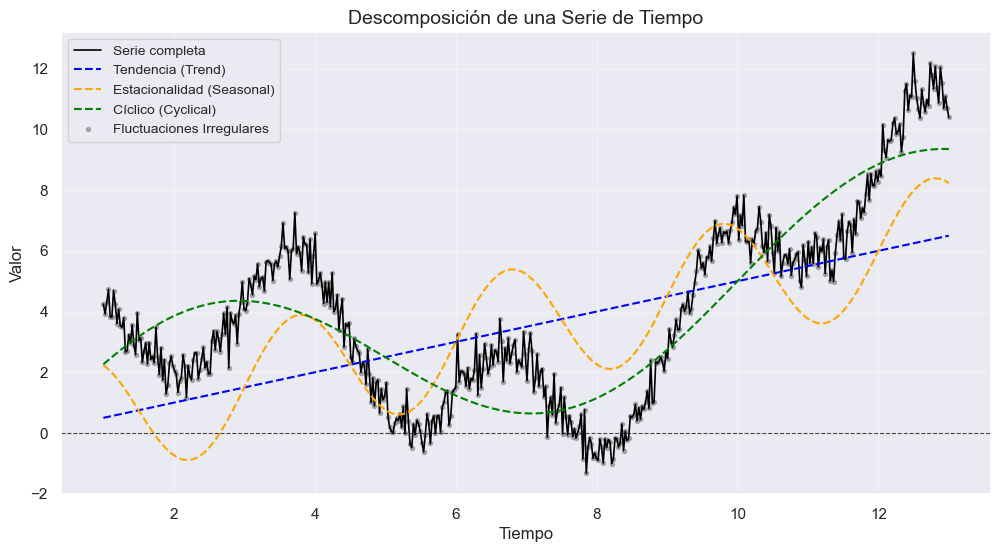

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
np.random.seed(42)  # Para reproducibilidad
time = np.linspace(1, 13, 500)  # Eje temporal

# Componentes
trend = 0.5 * time  # Tendencia lineal
seasonal = 2 * np.sin(2 * np.pi * time / 3)  # Estacionalidad (ciclo repetitivo)
cyclical = 3 * np.sin(2 * np.pi * time / 10)  # Ciclos (fluctuaciones más largas)
irregular = np.random.normal(0, 0.5, len(time))  # Fluctuaciones aleatorias

# Serie completa
series = trend + seasonal + cyclical + irregular

# Gráfica
plt.figure(figsize=(12, 6))
plt.plot(time, series, label='Serie completa', color='black', linewidth=1.2)
plt.plot(time, trend, label='Tendencia (Trend)', linestyle='--', color='blue')
plt.plot(time, trend + seasonal, label='Estacionalidad (Seasonal)', linestyle='--', color='orange')
plt.plot(time, trend + cyclical, label='Cíclico (Cyclical)', linestyle='--', color='green')
plt.scatter(time, series, s=8, label='Fluctuaciones Irregulares', color='gray', alpha=0.6)

# Etiquetas y leyenda
plt.title("Descomposición de una Serie de Tiempo", fontsize=14)
plt.xlabel("Tiempo", fontsize=12)
plt.ylabel("Valor", fontsize=12)
plt.axhline(0, color='black', linewidth=0.8, linestyle='--', alpha=0.7)
plt.legend(fontsize=10)
plt.grid(alpha=0.3)
plt.show()


<div style=" font-family: Arial, sans-serif; background-color:rgb(172, 218, 241); padding: 10px; border-radius: 2px; box-shadow: 0 5px 8px rgba(0, 0, 0, 0.5); line-height: 1.2;">


### **Componentes de series temporales aditivos y multiplicativos**

Existen dos técnicas para combinar componentes de series temporales:

- Aditivo
- Multiplicativo

El término aditivo significa que los componentes individuales (tendencia, estacionalidad y residuo) se suman:

$$X_{t}=T_{t}+E_{t}+I_{t}$$

donde: 

- $T_{t}$: es la tendencia 
- $E_{t}$: es la componente estacional 
- $I_{t}$: es la componente aleatoria.

Una tendencia aditiva indica una tendencia lineal, y una estacionalidad aditiva indica la misma frecuencia (ancho) y amplitud (altura) de los ciclos estacionales.

El término multiplicativo significa que los componentes individuales (tendencia, estacionalidad y residuos) se multiplican entre sí:

$$X_{t}=T_{t}\times E_{t}\times I_{t}$$


Una tendencia multiplicativa indica una tendencia no lineal (línea de tendencia curva), y una estacionalidad multiplicativa indica una frecuencia (ancho) y/o amplitud (altura) creciente/decreciente de los ciclos estacionales.


Tanto la tendencia como la estacionalidad pueden ser aditivas o multiplicativas, lo que significa que hay cuatro formas en que se pueden combinar:

- Tendencia aditiva y estacionalidad aditiva
- Tendencia aditiva y estacionalidad multiplicativa
- Tendencia multiplicativa y estacionalidad aditiva
- Tendencia multiplicativa y estacionalidad multiplicativa

## Tendencia aditiva y estacionalidad aditiva
La tendencia aditiva significa que la tendencia es lineal (línea recta) y la estacionalidad aditiva significa que no hay cambios en los anchos o alturas de los períodos estacionales a lo largo del tiempo.

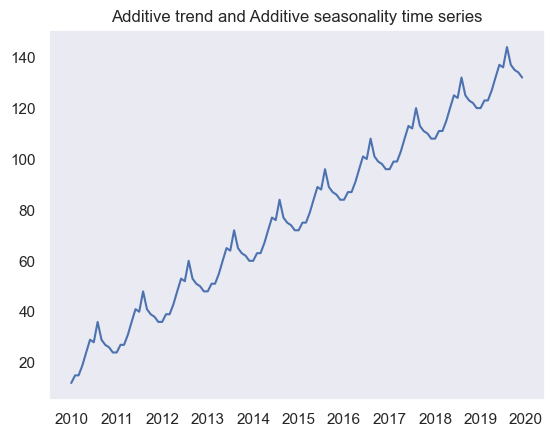

In [ ]:
seasonal_adders = [11, 13, 12, 15, 19, 23, 21, 28, 20, 17, 15, 12]
# data para 10 años
x_range = np.arange(1, 121)

time_series = []
for chunk in np.split(x_range, 10):
    for i, val in enumerate(chunk):
                time_series.append(val + seasonal_adders[i])

# Convertir to DataFrame
df_aa = pd.DataFrame(
    data={'y': time_series}, 
    index=pd.date_range(start='2010-01-01', freq='MS', periods=120)
)

plt.title('tendencia aditivia and Estacionalidad aditiva', size=12)
plt.plot(df_aa);

###  Tendencia aditiva y estacionalidad multiplicativa
La tendencia aditiva significa que la tendencia es lineal (línea recta) y la estacionalidad multiplicativa significa que hay cambios en los anchos o alturas de los períodos estacionales a lo largo del tiempo.

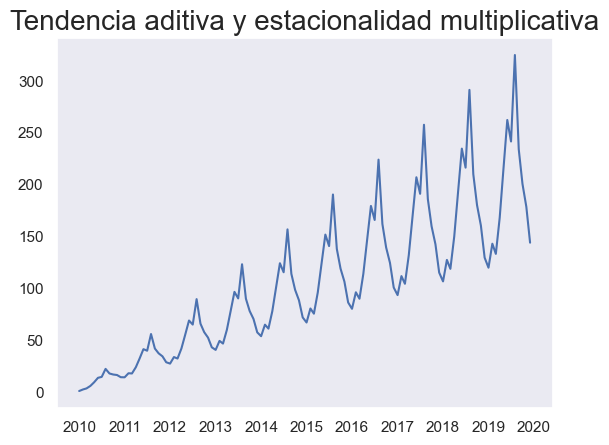

In [49]:
seasonal_multipliers = [1.1, 1.3, 1.2, 1.5, 1.9, 2.3, 2.1, 2.8, 2.0, 1.7, 1.5, 1.2]
# imitar a 10 años de datos
xs = np.arange(1, 121)

time_series = []
for chunk in np.split(xs, 10):
    for i, val in enumerate(chunk):
                time_series.append(val * seasonal_multipliers[i])
        
# Convertir a DataFrame
df_am = pd.DataFrame(
    data={'y': time_series}, 
    index=pd.date_range(start='2010-01-01', freq='MS', periods=120)
)

plt.title('Tendencia aditiva y estacionalidad multiplicativa', size=20)
plt.plot(df_am);

### Descomposición en acción
La `seasonal_decompose()`función de `statsmodels` acepta al menos dos parámetros:

- `x`: array— su serie temporal.
- `model`: str— tipo de componente estacional, puede ser aditivo o multiplicativo . El valor predeterminado es additive .

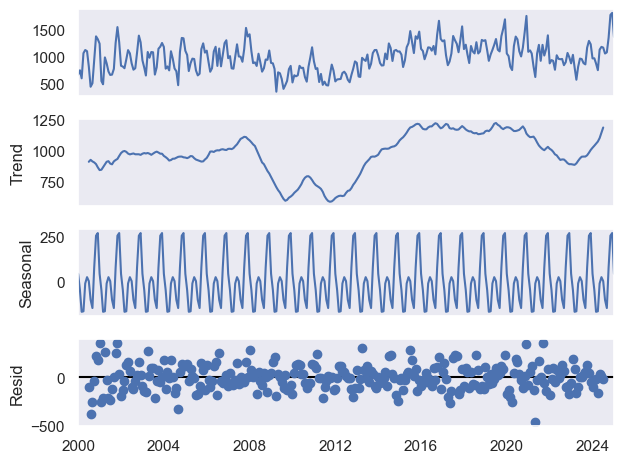

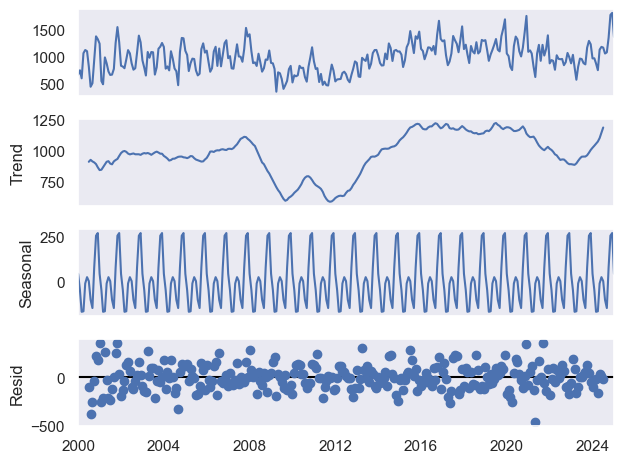

In [50]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposed = seasonal_decompose(cafe, model='additive')
decomposed.plot()

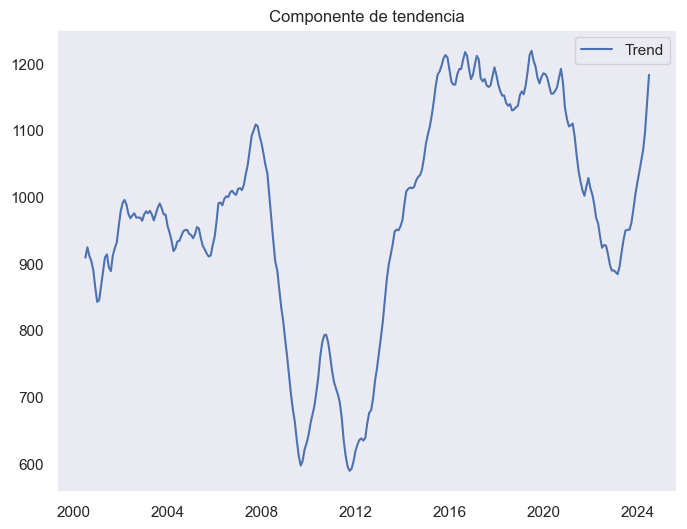

In [54]:
# Extraer el componente de tendencia
trend = decomposed.trend 

# Graficar el componente de tendencia
plt.figure(figsize=(8, 6)) 
plt.plot(trend, label= 'Trend' ) 
plt.title( 'Componente de tendencia' ) 
plt.legend() 
plt.show()

Para hacer inferencias estadísticas en la estructura de un proceso estocástico (o serie de tiempo) sobre el histórico observado del proceso, normalmente se deben hacer algunas suposiciones simplificadoras (presumiblemente razonables) sobre esa estructura. El supuesto más importante es el de  **estacionariedad**.
	 

Dicho concepto tendrá dos versiones:

- Estacionariedad fuerte 
- Estacionariedad débil





<div style=" font-family: Arial, sans-serif; background-color:rgba(248, 190, 31, 0.47); padding: 10px; border-radius: 2px; box-shadow: 0 5px 8px rgba(0, 0, 0, 0.5); line-height: 1.2;">


## Estacionariedad Fuerte y Débil.

Una serie de tiempo se puede ver como un proceso estocástico, se dice que es estacionario si su media y varianza son constantes en el tiempo y si el valor de la covarianza entre 2 periodos depende sólo de la distancia o rezago entre los tiempos.

Sea $Y_t$ una serie de tiempo con las siguientes propiedades se dice que es debilmente estacionaria o simplemente estacionaria:



 * $E(y_t)$ es  constante para todo $t$.
 * $Var(y_t)$ es constante para todo $t$ y,
 * $Cov(y_t,y_{t+h})$ sólo depende de $h$ para cualquier $t$
 
 La condición adicional para que una serie de tiempo sea fuertemente estacionaria es que la distribución conjunta de $Y_{t_1},Y_{t_2}, \cdots, Y_{t_n}$ es la misma que la distribución conjunta de $Y_{t_1-k}, Y_{t_2-k}, \cdots, Y_{t_n-k}$ para todas las opciones de puntos de tiempo $t_1, t_2, \cdots, t_n$ y todas las opciones de rezago temporal $k$. es decir, la distribución sólo depende de la diferencia de tiempo $h$ y no del tiempo $(t_1,...,t_k)$



<span style="color: red;">
*En la práctica, buscamos que los datos sean estacionarios para poder proseguir con el tratamiento estadístico de los mismos.*
</span>



<span style="color: red;">
**La estacionariedad es un concepto fundamental para el análisis
de las series de tiempo.** 
</span>




- La estacionariedad significa que el proceso mediante el cual se crearon los datos, es constante en el tiempo.

-  **CUIDADO**: Esto no significa que los datos no puedan cambiar. Significa que los supuestos distribucionales del mecanismo que genera los datos son constantes en el
tiempo.
- El punto de partida de la metodología Box-Jenkins es la estacionariedad. De ahí su importancia práctica.




## Asi se ve la no estacionariedad


!["No estacionariedad"](https://github.com/Wilsonsr/Series-de-Tiempo/raw/main/Data/noestacionariedad.jpg)



![Estacionariedad vs no estacionariedad](https://github.com/Wilsonsr/Series-de-Tiempo/raw/main/Data/estavsnoest.jpg)




<span style= "color: #5a8d84 ">

## **Ruido Blanco**

</span>


El objetivo de las Series Temporales es descomponer la serie observada en dos partes: una es la parte dependiente del pasado y la otra la parte impredecible

$$Y_t=f(Y_{(t-1)}, Y_{(t-2)},....,Y_1)+ a_t $$

- Si todas las series que observamos en la realidad fuesen Ruido Blanco serían impredecibles y no habría ningún modelo que proponer.


Un **Ruido Blanco** es una serie tal que su media es cero, la varianza es constante y es incorrelacionada.


* $E(a_t)=0$
* $Var(a_t)=\sigma_a^2$
* $cov(a_t,a_{t+_h})=0$



Se trata de un proceso en el que todas sus variables son independientes.


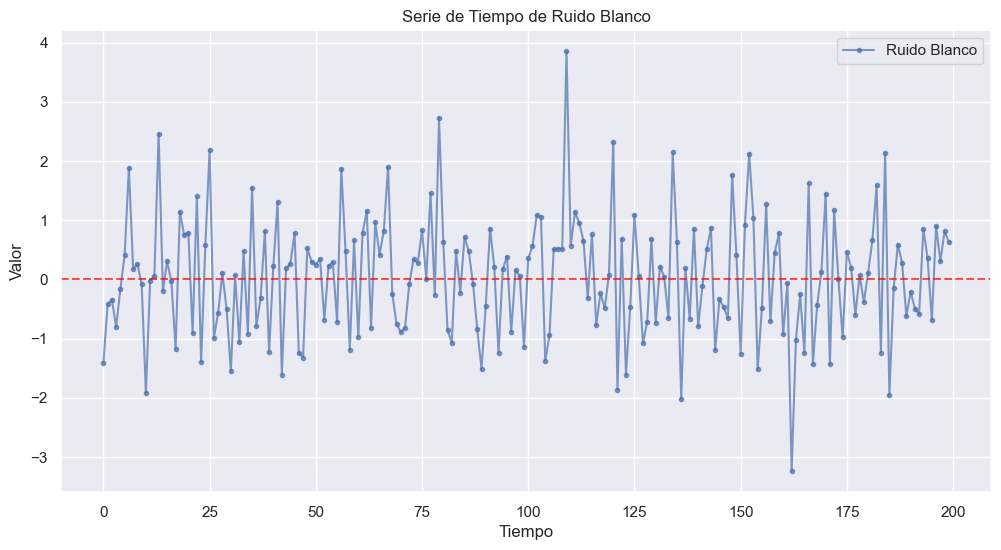

In [61]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros del ruido blanco
n = 200  # Número de puntos
media = 0
desviacion_estandar = 1

# Generar ruido blanco (valores aleatorios con distribución normal)
ruido_blanco = np.random.normal(media, desviacion_estandar, n)

# Crear la figura
plt.figure(figsize=(12, 6))
plt.plot(ruido_blanco, linestyle='-', marker='o', markersize=3, alpha=0.7, label="Ruido Blanco")
plt.axhline(y=0, color='red', linestyle='--', alpha=0.7)  # Línea de referencia en 0
plt.title("Serie de Tiempo de Ruido Blanco")
plt.xlabel("Tiempo")
plt.ylabel("Valor")
plt.legend()
plt.grid(True)

# Mostrar la gráfica
plt.show()

In [9]:
import pandas as pd
import numpy as np
import datetime as dt

ipc=pd.read_excel("https://github.com/Wilsonsr/Series-de-Tiempo/raw/main/Data/IPC.xlsx")
ipc

,Año(aaaa)-Mes(mm),Índice,Inflación anual %,Inflación mensual %,Inflación año corrido %
0,200001,40.30,8.25,1.29,1.29
1,200002,41.23,8.89,2.30,3.62
2,200003,41.93,9.73,1.71,5.39
3,200004,42.35,9.96,1.00,6.44
4,200005,42.57,10.00,0.52,7.00
...,...,...,...,...,...
278,202303,131.77,13.34,1.05,4.56
279,202304,132.80,12.82,0.78,5.38
280,202305,133.38,12.36,0.43,5.83
281,202306,133.78,12.13,0.30,6.15


In [10]:
ipc.index=pd.to_datetime(ipc["Año(aaaa)-Mes(mm)"].astype(str), format="%Y%m")

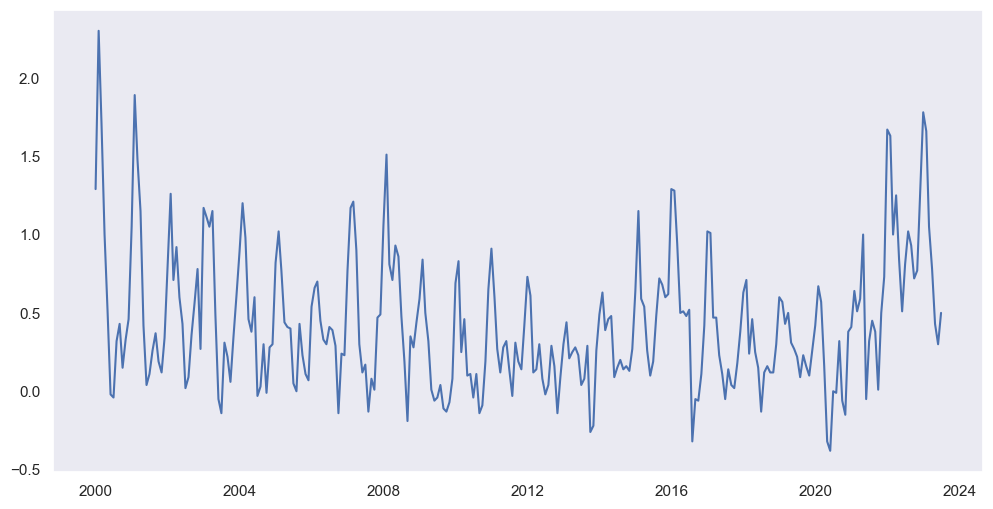

In [11]:
plt.figure(figsize=(12, 6))
plt.plot(ipc.index, ipc["Inflación mensual %"])
# Configurar el formato de las fechas en el eje x


In [12]:
import plotly.express as px

In [13]:
px.line(data_frame=ipc, x=ipc.index, y=ipc["Inflación mensual %"])

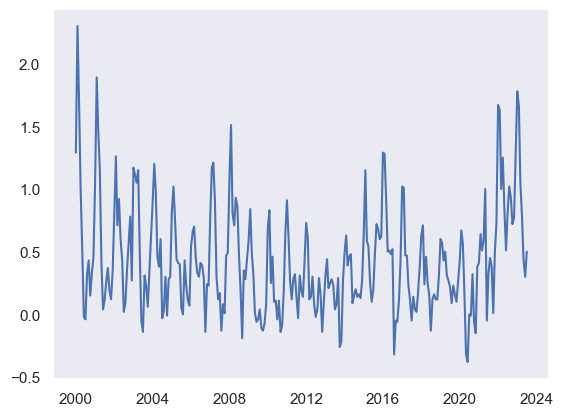

In [14]:
plt.plot(ipc.index, ipc["Inflación mensual %"])